# 9. Проект

In [79]:
import cv2
import numpy as np
import random
import imutils
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

## 9.2. Обзор функций, которые используются в проекте

In [80]:
# функция ввода изображения
def img_input(img_path, size=(0, 0), type=1):
    img = cv2.imread(img_path, type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img


# функция вывода изображения
def img_print(images, titles, row_and_colm=(0, 0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

### Функция def shelf () предназначена для удаления фона.
В процессе работы этой программы сканируется все строки, начиная с верхней. Если при сканировании интенсивности пикселей не меняются, то они обнуляются. В результате на изображении фон становится темным.

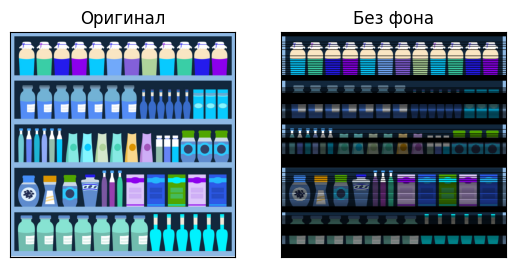

In [81]:
def shelf(img, k=120):
    img_copy = np.copy(img)
    x = 0
    for i in range(img_copy.shape[1]):
        if x > ((img_copy.shape[1]) / 1.01):
            img_copy[i - 1] = [0, 0, 0]
            img_copy[i - 2] = [0, 0, 0]
            x = 0
        for j in range(img_copy.shape[0]):
            if (img_copy[i][0][0] - k <= img_copy[i][j][0] <= img_copy[i][0][0] + k) and (
                    img_copy[i][0][1] - k <= img_copy[i][j][1] <= img_copy[i][0][1] + k) and (
                    img_copy[i][0][2] - k <= img_copy[i][j][2] <= img_copy[i][0][2] + k):
                x += 1
    return img_copy.astype(np.uint8)


img = cv2.imread("img/shelf.jpg")
img = cv2.resize(img, (800, 800))

img_2 = shelf(img, k=75)

res = [img, img_2]
title = ['Оригинал', 'Без фона']

img_print(res, title)

### Функция удаления фона 2.

C:\Users\kuvsh\Desktop\СКФУ\2_4_семестр\Технологии распознавания образов\Git\PyCharm\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


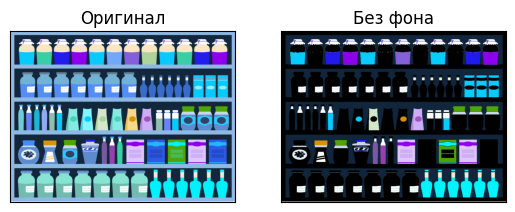

In [82]:
import numpy as np
from sklearn.cluster import KMeans


def get_color(image):
    """
    Получает доминирующий цвет изображения.

    Parameters:
    -----------
    image: array
        RGB-изображение в виде numpy массива

    Returns:
    --------
    dominant_color : list
        RGB-значение доминирующего цвета
    """
    # Преобразуем изображение в одномерный массив и приводим тип данных к float32
    pixels = np.float32(image.reshape(-1, 3))
    # Задаем количество цветов для извлечения
    n_colors = 1
    # Создаем объект KMeans из библиотеки scikit-learn
    kmeans = KMeans(n_clusters=n_colors)
    # Применяем алгоритм k-средних на массив пикселей и извлекаем доминирующий цвет
    kmeans.fit(pixels)
    # Сохраняем RGB значение доминирующего цвета в списке
    dominant_color = list(kmeans.cluster_centers_[0])
    # Возвращаем значение RGB доминирующего цвета
    return dominant_color


import cv2
import numpy as np
from typing import Tuple


def background(imr: np.ndarray, p: int = 40) -> np.ndarray:
    """
    Определяет и удаляет фоновый цвет изображения.

    Parameters:
    -----------
    imr : array_like
        Исходное изображение.
    p : int, optional
        Погрешность в определении доминирующего цвета. Значение по умолчанию - 40.

    Returns:
    --------
    array_like
        Изображение с удаленным фоновым цветом.
    """
    # Преобразуем изображение в формат HSV для определения доминирующего цвета
    hsv_image = cv2.cvtColor(imr, cv2.COLOR_BGR2HSV)
    # Получаем доминирующий цвет в формате HSV
    dom_color = get_color(hsv_image)
    # Создаем массив с заданными размерами и заполненный белым цветом
    dom_color_hsv = np.full(imr.shape, [255, 255, 255], dtype='uint8')
    # Определяем нижнюю и верхнюю границы доминирующего цвета с учетом погрешности
    lower = np.array([dom_color[0] - p, dom_color[1] - p, dom_color[2] - p])
    upper = np.array([dom_color[0] + p, dom_color[1] + p, dom_color[2] + p])
    # Создаем маску для удаления фона
    mask = cv2.inRange(hsv_image, lower, upper)
    # Обновляем значения на противоположные для выделения фона
    res = cv2.bitwise_not(dom_color_hsv, hsv_image, mask=mask)
    # Конвертируем обратно в формат BGR
    return cv2.cvtColor(res, cv2.COLOR_HSV2BGR)


image = cv2.imread('img/shelf.jpg')
img2 = image.copy()
imr = background(image, p=100)

res = [image, imr]
title = ['Оригинал', 'Без фона']

img_print(res, title)

### Описание функции segment().
Функция segment() предназначена для разбиения всего поля изображени на сегменты, с последующей их маркировкой

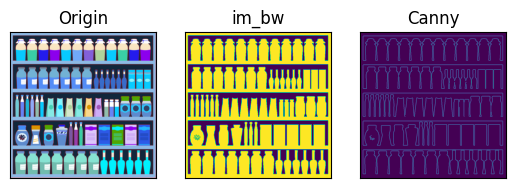

In [83]:
def segment(img):
    """
    Выполняет сегментацию изображения с помощью оператора водораздела.

    Parameters:
    -----------
    img : array_like
        Исходное изображение.

    Returns:
    --------
    array_like
        Обработанное изображение, в котором выделены различные сегменты.
    """
    # Конвертируем изображение в оттенки серого
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Создаем двоичное изображение по порогу, значение которого равно 30
    im_bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)[1]
    # Создаем ядро размером 4x3 и применяем к изображению операцию морфологического открытия
    kernel = np.ones((4, 3), np.uint8)
    opening = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel, iterations=1)
    # Расширяем результат операции открытия, чтобы получить фон
    sure_bg = cv2.dilate(opening, kernel, iterations=1)
    # Применяем преобразование расстояний и определяем объекты на переднем плане
    dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
    ret, sure_fg = cv2.threshold(dist_transform, 0.01 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    # Используем оператор Кэнни для определения границ областей, которые не известны
    unknown = cv2.Canny(sure_bg, 700, 100, apertureSize=3)
    # Объединяем объекты на переднем плане в связные компоненты
    ret, mark = cv2.connectedComponents(sure_fg)
    mark = mark + 1
    mark[unknown == 255] = 0
    # Выполняем операцию водораздела и выделяем граничные области на исходном изображении
    markers = cv2.watershed(img, mark)
    img[markers == -1] = [255, 0, 0]

    res = [img, im_bw, unknown]
    title = ['Origin', 'im_bw', 'Canny']
    img_print(res, title)
    # Возвращаем обработанное изображение
    return img


# Загружаем изображение
imgor = cv2.imread('img/shelf.jpg')
img = cv2.resize(imgor, (800, 800))

marker = segment(img)


### Распознавание объекта по шаблону.
Метод заключается в поиске объекта на большом изображении, который соответствует выбранному шаблону. Поиск проводится с помощью функции
 cv2.matchTemplate(). Шаблон перемещается по исходному изображению, его пиксели сравниваются с пикселями этого изображения. На выходе получаем изображение в градациях серого.

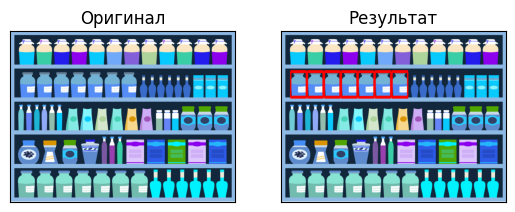

In [84]:
# Загружаем изображение и шаблон
img_rgb = cv2.imread('img/shelf.jpg')
template = cv2.imread('img/1.jpg', 0)
# Копируем исходное изображение для вывода результата с выделенными объектами
res_img = img_rgb.copy()
# Преобразуем изображение в оттенки серого, чтобы применить поиск шаблона
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# Получаем размеры шаблона
w, h = template.shape[::-1]
# Выполняем соответствие шаблона на исходном изображении
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
# Задаем порог срабатывания
threshold = 0.8
# Получаем координаты срабатываний, где значение больше порога
loc = np.where(res >= threshold)
# Выделяем области срабатываний на изображении
for pt in zip(*loc[::-1]):
    cv2.rectangle(res_img, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 1)
# Отображаем и сохраняем результаты
cv2.imwrite('img/res.png', res_img)
res = [img_rgb, res_img]
title = ['Оригинал', 'Результат']
img_print(res, title)

Приведение объектов распознавания к единому размеру. Для правильного создания признаков объектов их нужно привести к одинаковому размеру по высоте. Для этого у каждого объекта определяем коэффициент пересчета k = h1/h0, где h0 – стандартная высота, в нашем случае h0 = 160, h1 – старая высота. Тогда новая ширина равна w = w1* h1/h0. После изменения размера записываем матрицу изображения в новый файл.

In [85]:
image = cv2.imread('img/1.jpg', 1)
s = image.shape  # Получаем размер исходного изображения
h1, w1 = s[0], s[1]  # Запоминаем отдельно высоту и ширину
wr = round(77 * h1 / 160)
img = cv2.resize(image, (wr, 113))  # изменяем размер
cv2.imwrite("img/r1.jpg", img)
print(s)
print(w1)

(113, 69, 3)
69


## 9.3. Создание таблицы признаков


0 0 16 57


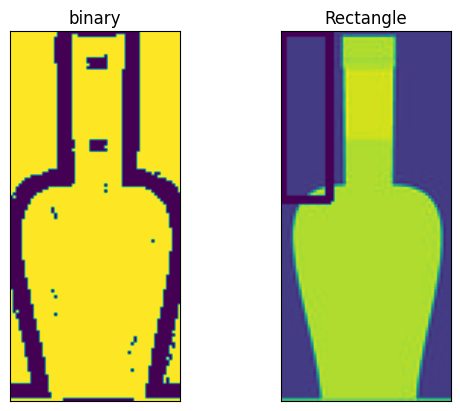

s: 727.5
p: 138.0712275505066
w,h: 16 57
w/h, s/wh: 0.2807017543859649 0.7976973684210527
d: 30.434877505829245
{'m00': 727.5, 'm10': 5253.0, 'm01': 18065.5, 'm20': 51376.08333333333, 'm11': 128150.95833333333, 'm02': 595292.25, 'm30': 568215.0, 'm21': 1250667.6, 'm12': 4115489.4, 'm03': 22077623.25, 'mu20': 13446.17405498281, 'mu11': -2293.1262027491466, 'mu02': 146684.29089347075, 'mu30': 3068.5115166330943, 'mu21': 7996.741481442412, 'mu12': -69001.6603690316, 'mu03': 10128.739145029336, 'nu20': 0.02540579172184138, 'nu11': -0.004332733345613107, 'nu02': 0.27715174056701414, 'nu30': 0.00021495386750333502, 'nu21': 0.000560183821876765, 'nu12': -0.004833670553320736, 'nu03': 0.0007095334791330395}


In [86]:
img = cv2.imread('img/5.jpg', 0)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
contours, hierarchy = cv2.findContours(th, 5, 5)
cnt = contours[0]  # создание контура
area = cv2.contourArea(cnt)
prm = cv2.arcLength(cnt, True)
hull = cv2.convexHull(cnt)  #выпуклая оболочка
#print(hulL)
x, y, w, h = cv2.boundingRect(cnt)
print(x, y, w, h)
image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

res = [th, image]
title = ['binary', 'Rectangle']
img_print(res, title)

# параметры бинарного изображения
x, y, w, h = cv2.boundingRect(cnt)
epsilon = 0.1 * cv2.arcLength(cnt, True)
aspect_ratio = float(w) / h  # соотношение сторон
rect_area = w * h
extent = float(area) / rect_area
hull_area = cv2.contourArea(hull)  #площадь выпуклой оболочки
equi_diameter = np.sqrt(4 * area / np.pi)
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
M = cv2.moments(cnt)
x, y, w, h = cv2.boundingRect(cnt)
#print(M) # вычисление моментов
pixelpoints = np.transpose(np.nonzero(mask))
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask=mask)
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
print("s:", area)  # вычисление площади
print("p:", prm)  # вычисление периметра
print("w,h:", w, h)
print("w/h, s/wh:", aspect_ratio, extent)
print("d:", equi_diameter)
print(M)